In [19]:
packages <- c("stats", "cluster", "factoextra")
lapply(packages, library, character.only = TRUE)

[[1]]
 [1] "NbClust"    "factoextra" "ggplot2"    "cluster"    "stats"     
 [6] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[11] "base"      

[[2]]
 [1] "NbClust"    "factoextra" "ggplot2"    "cluster"    "stats"     
 [6] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[11] "base"      

[[3]]
 [1] "NbClust"    "factoextra" "ggplot2"    "cluster"    "stats"     
 [6] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[11] "base"

In [20]:
sales <- read.csv("VGSales.csv")
sales$Name <- NULL
sales$Publisher<- NULL
sales$Platform<- NULL
sales$Year<- NULL
sales$Genre<- NULL
sales <- sales[1:1000,]
df <- scale(sales) # Scaling the data
# View the firt 3 rows of the data
head(df, n = 3)

Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
-1.728305,15.064589,17.099855,3.100903,12.5170319,16.294261
-1.724848,10.320939,1.429828,6.029173,0.5735066,7.466997
-1.721390,5.263849,7.158258,3.120168,4.5184422,6.548962


In [21]:
kmeans(sales, 3, iter.max = 10, nstart = 1)

K-means clustering with 3 clusters of sizes 335, 333, 332

Cluster means:
     Rank NA_Sales  EU_Sales  JP_Sales Other_Sales Global_Sales
1 834.000 1.029701 0.5458806 0.2841493   0.1741194     2.033851
2 499.036 1.445916 0.8733634 0.3402402   0.2887387     2.948258
3 166.500 3.773042 2.3644578 1.0309940   0.7417470     7.909849

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   3    3    3    3    3    3    3    3    3    3    3    3    3    3    3    3 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   3    3    3    3    3    3    3    3    3    3    3    3    3    3    3    3 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   3    3    3    3    3    3    3    3    3    3    3    3    3    3    3    3 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   3    3    3    3    3    3    3    3    3    3    3    3    3    3    3    3 
  

In [22]:
# Standardize the data
sales <- scale(sales) 
head(df)

Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
-1.728305,15.064589,17.0998547,3.100903,12.5170319,16.294261
-1.724848,10.320939,1.4298283,6.029173,0.5735066,7.466997
-1.721390,5.263849,7.1582578,3.120168,4.5184422,6.548962
-1.717932,5.225625,6.0064123,2.628912,3.9748487,5.963247
-1.714475,3.513171,4.7005767,9.313844,0.9307252,5.624695
-1.711017,8.073344,0.6167609,3.534364,0.2784130,5.394148


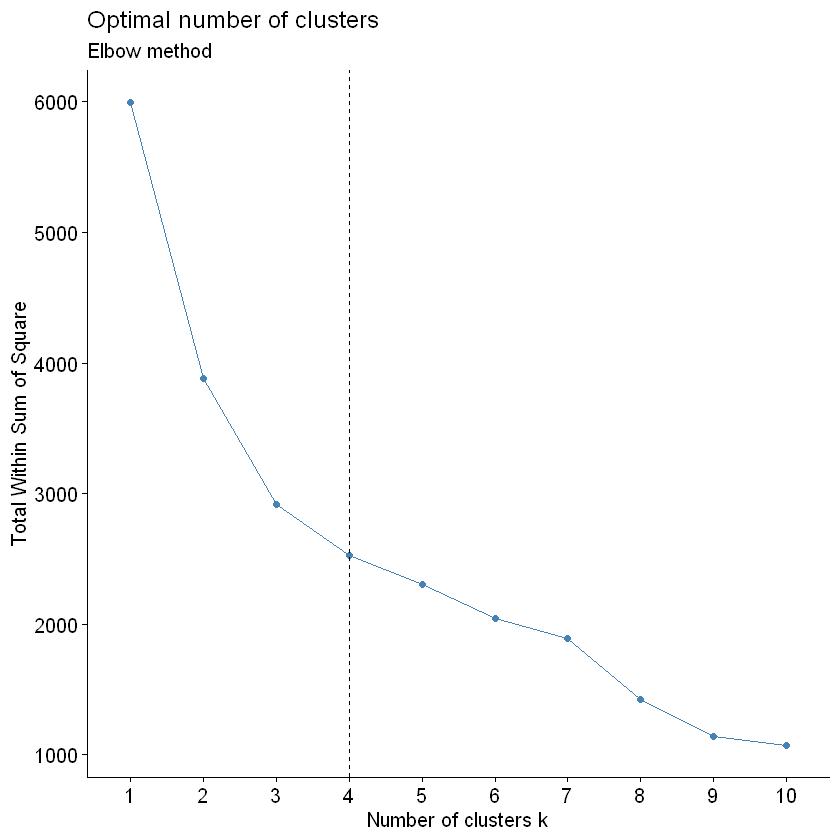

In [23]:
# Elbow method
fviz_nbclust(sales, kmeans, method = "wss") + geom_vline(xintercept = 4, linetype = 2) + labs(subtitle = "Elbow method")

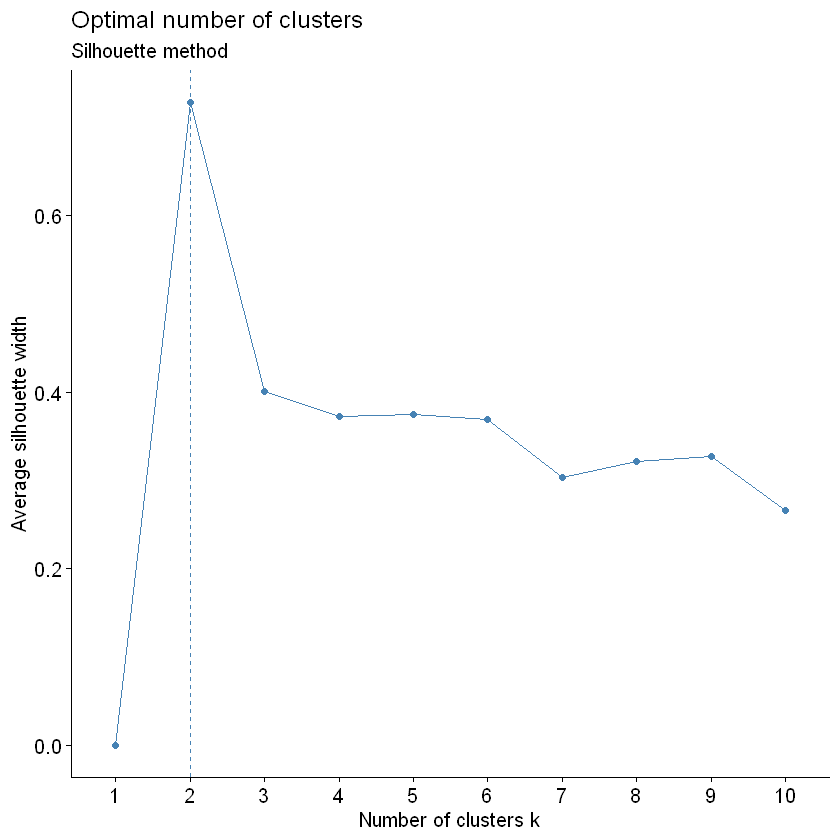

In [24]:
# Silhouette method
fviz_nbclust(sales, kmeans, method = "silhouette") + labs(subtitle = "Silhouette method")

Warning message in pf(beale, pp, df2):
"NaNs produced"

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


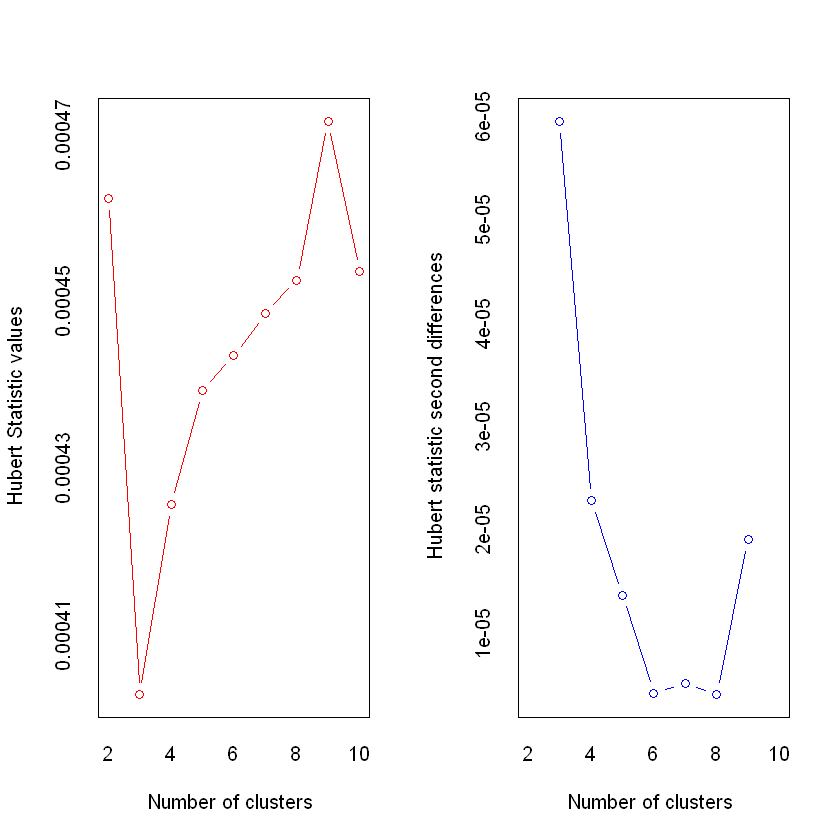

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 10 proposed 2 as the best number of clusters 
* 6 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 3 proposed 9 as the best number of clusters 
* 3 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


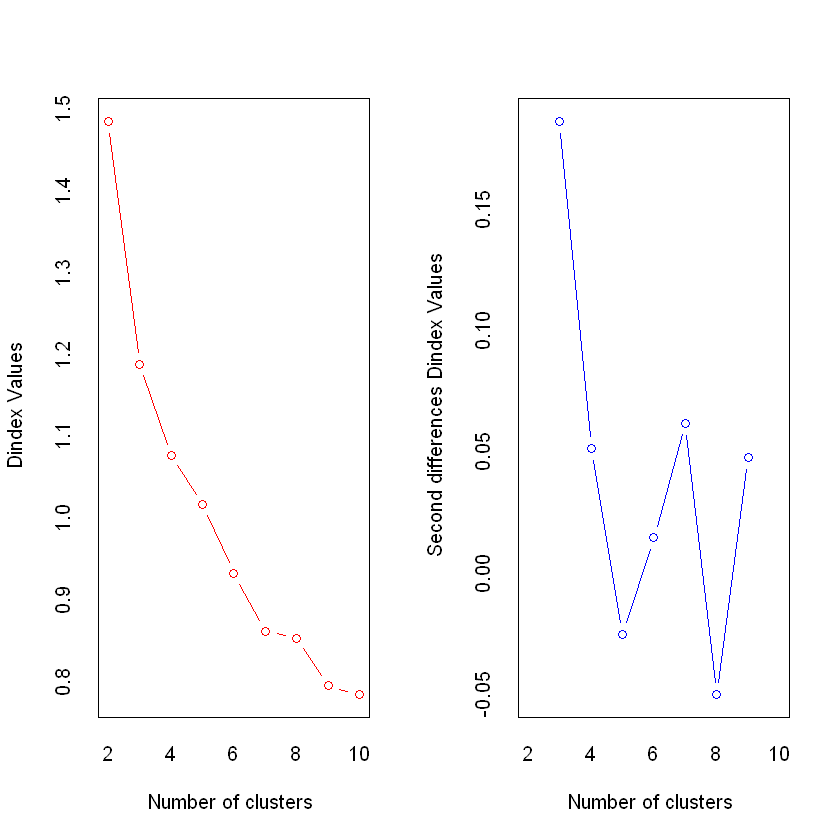

In [25]:
library("NbClust")
nb <- NbClust(sales, distance = "euclidean", min.nc = 2, max.nc = 10, method = "kmeans")

Among all indices: 
* 2 proposed  0 as the best number of clusters
* 10 proposed  2 as the best number of clusters
* 6 proposed  3 as the best number of clusters
* 2 proposed  4 as the best number of clusters
* 3 proposed  9 as the best number of clusters
* 3 proposed  10 as the best number of clusters

Conclusion
* According to the majority rule, the best number of clusters is  2 .



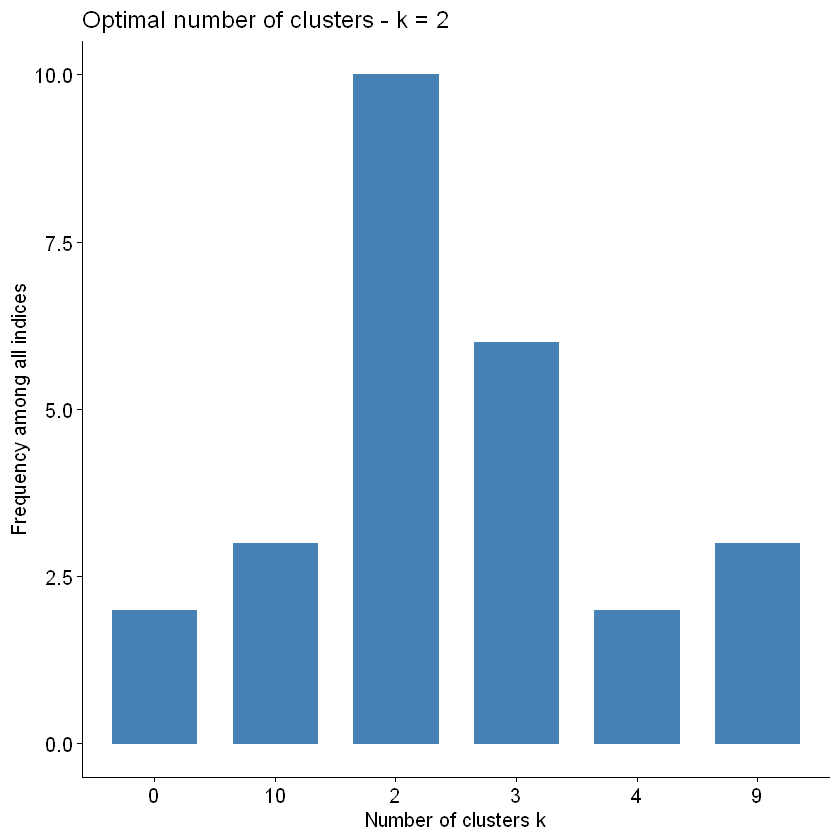

In [26]:
library("factoextra") 
fviz_nbclust(nb)